
## Data Description

1. **Invoice Number** : Id unik untuk mengidentifikasi setiap transaksi atau invoice
2. **Stock Code**: Id unik untuk setiap item pada stok
3. **Description** : Deskripsi singkat setiap item
4. **Quantity** : Jumlah item yang dibeli
5. **Invoice Date** : Tanggal transaksi atau invoice
6. **Unit Price** : Harga setiap item
7. **Customer ID** : Id unik untuk setiap pembeli
8. **Country** : Negara setiap pembeli 

### Import Libraries

In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Membaca Dataset

In [114]:
df = pd.read_csv('Dataset/ecommerce_data.csv', encoding='utf-8')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Melihat Info Dataset

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535874 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535874 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


### Menghitung Nilai Null Pada Dataset

In [116]:
df.isna().sum()

InvoiceNo           0
StockCode        6035
Description      7489
Quantity         6035
InvoiceDate      6035
UnitPrice        6035
CustomerID     138727
Country          6035
dtype: int64

### Melihat Perbandingan Null Value Tiap Atribut

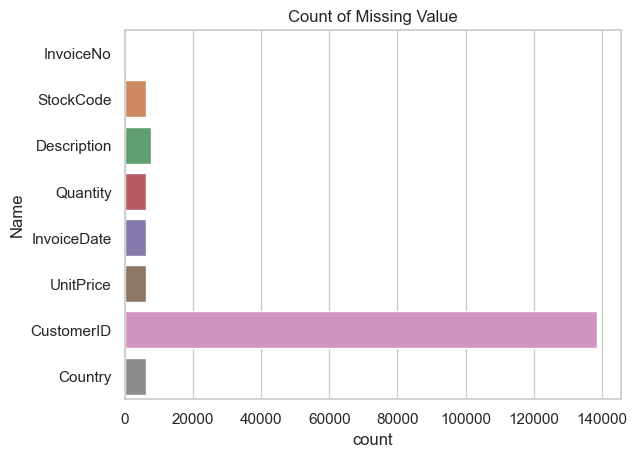

In [117]:
missing_value = df.isna().sum()

missing_values = missing_value.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_value.index

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'count', y = 'Name', data=missing_values)
plt.title("Count of Missing Value")
plt.show()

## Data Wrangling

### Menghapus Baris Yang Bernilai Null

In [118]:
df.dropna(subset=['StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], inplace=True)

### Melakukan Pengecekan Nilai Null Tiap Atribut Setelah Dihapus

In [119]:
df.isna().sum()

Name
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Melakukan Drop Row Yang Memiliki Value CRUK dan M

In [120]:
df = df[~df['StockCode'].str.contains('CRUK|M', case=False)]

### Mengubah Format Atribut InvoiceDate Menjadi Format Tanggal

In [121]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### Membuat Atribut Baru Berdasarkan Atribut InvoiceDate

In [122]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour

### Melakukan Pengecekan Dataset

In [123]:
df

Name,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12


In [124]:
df[df['Description'] == 'POSTAGE'].value_counts()
df[df['Description'] == 'Discount'].value_counts()

Name,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour
45,536370,POST,POSTAGE,3.0,2010-12-01 08:45:00,18.0,12583.0,France,2010,12,1,8
386,536403,POST,POSTAGE,1.0,2010-12-01 11:27:00,15.0,12791.0,Netherlands,2010,12,1,11
1123,536527,POST,POSTAGE,1.0,2010-12-01 13:04:00,18.0,12662.0,Germany,2010,12,1,13
5073,536840,POST,POSTAGE,1.0,2010-12-02 18:27:00,18.0,12738.0,Germany,2010,12,2,18
5258,536852,POST,POSTAGE,1.0,2010-12-03 09:51:00,18.0,12686.0,France,2010,12,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1.0,2011-12-09 10:10:00,15.0,12423.0,Belgium,2011,12,9,10
541216,581494,POST,POSTAGE,2.0,2011-12-09 10:13:00,18.0,12518.0,Germany,2011,12,9,10
541730,581570,POST,POSTAGE,1.0,2011-12-09 11:59:00,18.0,12662.0,Germany,2011,12,9,11
541767,581574,POST,POSTAGE,2.0,2011-12-09 12:09:00,18.0,12526.0,Germany,2011,12,9,12


### Menyimpan Dataset Yang Telah Dibersihkan

In [126]:
df.to_csv('Dataset/clean_data.csv', index=False)